Image path:  Z:\qfavey\01_Experiments\01_CSF_FLOW\IMAGING_TESTS\Successful_Images\Inpp5e_A\Inpp5e_A02_cropped.tif
----- Input image: Inpp5e_A02_cropped.tif

Loading from previous processing!
Analyzing Inpp5e_A02_cropped.tif:
threshold: 	0.8 
method: 	Quantile 
filter size: 	None
Detecting and processing blobs for d-v positions: 100.0%
Detected 354 traces.
Done! 




(array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         0.0

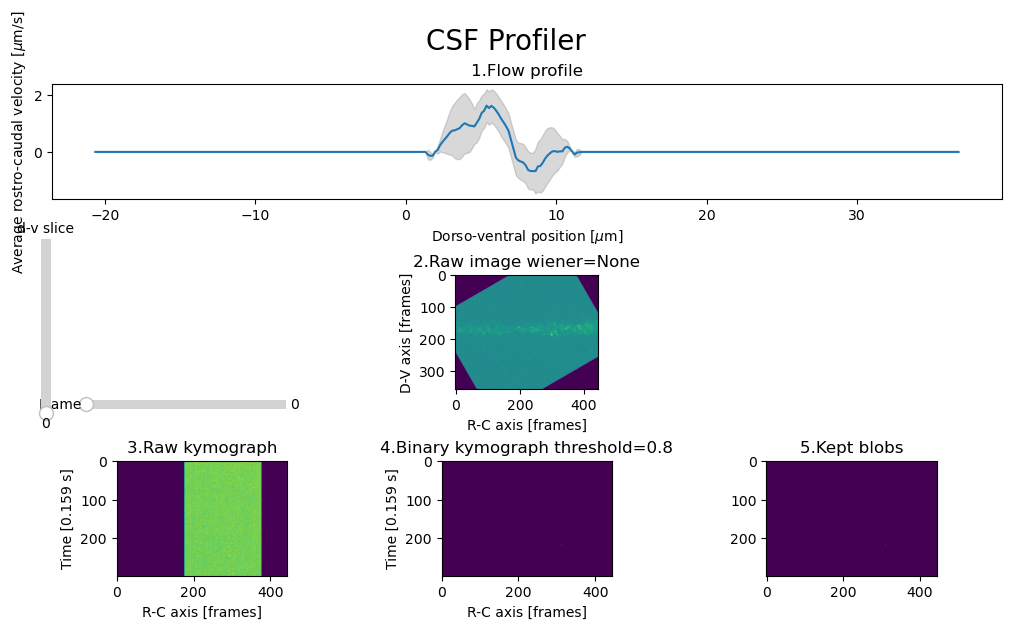

In [2]:
from funcs import kymo as ky
import PySimpleGUI as sg
import matplotlib.pyplot as plt
import matplotlib.image
import numpy as np
import matplotlib.lines as mlines


# Prompt user to choose file


path = sg.popup_get_file("", no_window=True, default_extension=".tif")
print("Image path: ",path.replace("/","\\"))
# pixel size: 0.16250000000000003 or 0.189 (pub)
pixel_size = 0.16250000000000003
frame_time = 0.159
exp1 = ky.Kymo(path.replace("/","\\"), pixel_size=pixel_size, frame_time=frame_time)
exp1.generate_kymo(threshold=0.8,dash=False)

In [5]:
from skimage.measure import label, regionprops

kymos = exp1.labeled_img_array.copy()
speed_image = np.zeros_like(kymos)

for id, kymo in enumerate(kymos):
    speed_image[id] = speed_image[id].astype(float)
    for region in regionprops(kymo):
        # take regions with large enough areas
        if (region.area < 100) and (region.area >= 15) and (region.eccentricity>0.9) and (np.degrees(region.orientation)>-95) and (np.degrees(region.orientation)<95) and (np.round(region.orientation,1)!= 0.0):         
            speed = (np.tan(-region.orientation))*(pixel_size/frame_time) 
            for l,c in zip(range(0,np.shape(speed_image[id])[0]),range(0,np.shape(speed_image[id])[1])):
                for coords in region.coords:
                    #print(l,c,coords[0],coords[1])
                    if l == coords[0] and c == coords[1]:
                        
                        speed_image[id][l,c] = 0
                    else:
                        speed_image[id][l,c] = 1
                   
tagged = np.swapaxes(speed_image,1,2)
print(np.shape(tagged))
print(np.shape(speed_image))


(354, 445, 299)
(354, 299, 445)


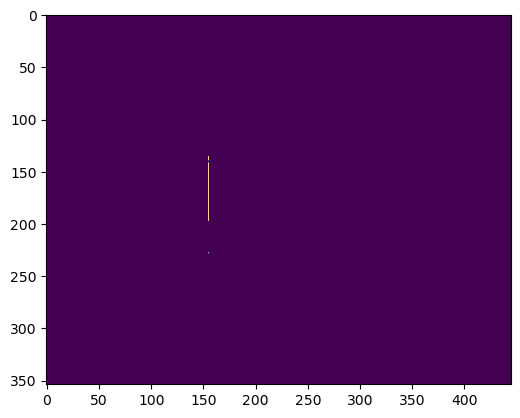

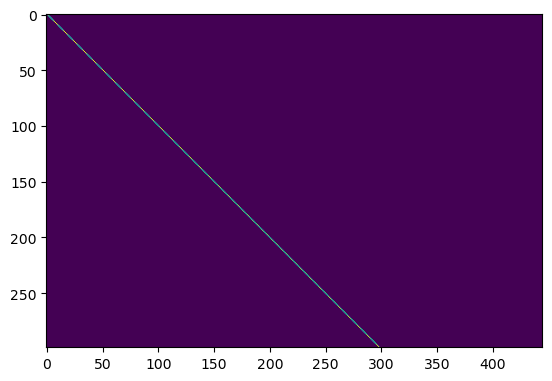

In [7]:
tagged = np.swapaxes(speed_image,1,2)
plt.imshow(tagged[:,:,155])
plt.show()
plt.imshow(speed_image[150])
plt.show()